# Final Capstone Project


# Introduction: 
In recent years, the global demand for electricity has been rapidly increasing, driven by factors such as population growth, economic development, and technological advancements. However, with the limited resources and growing concerns about environmental impact, it is becoming increasingly important to accurately predict and manage electricity consumption. Accurate electricity forecasting can help energy companies to optimize their production and distribution processes, reduce waste, and minimize the environmental impact of energy production. This not only benefits the companies themselves but also has a positive impact on society as a whole. For instance, efficient and sustainable energy production can help to reduce greenhouse gas emissions, improve energy security, and provide affordable and reliable electricity to communities. Therefore, the project of predicting regional electricity consumption can be seen as a valuable contribution to the sustainable development of society.


# The following business challenges will be addressed by this initiative.
There are several elements that influence energy usage. The unpredictability of these components complicates energy prediction.
•Given this complication, our objective is to employ different prediction models to anticipate the true demand   for energy consumption using the variables supplied in the dataset and determine which one is the most accurate
•Trying to identify a pattern and change in power usage due to climatic conditions over the course of a year.
•Investigating the effects of changing seasons, holidays, and weekends on electricity use.
•Which zone uses the most energy?
•To assist the Tetouan municipal administration and electrical companies in balancing consumption and output.

# Power consumption of Tetouan city Data Set

Abstract: This information is connected to the power usage of three separate distribution networks in Tetouan, Morocco. The data set contains 52,416 energy consumption data points at 10-minute intervals from January 1, 2017 (0:00) to December 30, 2017 (23:50). Because the three zone power plants electrify three separate regions of the city, there are three target variables.

# Attribute Information:
Date Time: Time duration of ten minutes.

Temperature: Weather Temperature of Tetouan city in degrees Celsius.

Humidity: Weather Humidity of Tetouan city in %.

Wind Speed: Wind Speed of Tetouan city in kmph.

general diffuse flows

diffuse flows

power consumption of zone 1 of Tetouan city in KiloWatts(KW).

power consumption of zone 2 of Tetouan city in KW.

power consumption of zone 3 of Tetouan city in KW.

In [1]:
#Importing the relevant libraries to do the data analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

from datetime import datetime

# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")

/Users/samarthyadav/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Exploratory Data Analysis.

In [2]:
# Load data from URL using pandas read_csv method
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
# Trying to find out any null or missing value and the datatypes of the variables
data.info()
#To find the number of attributes and rows (although we can get the number of rows already from the .info() object above)
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


(52416, 9)

In [4]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [5]:
#Converting object to datetime datatype

data['DateTime'] = pd.to_datetime(data['DateTime'], errors='coerce') 


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [7]:
#transforming DateTime column into index
data = data.set_index('DateTime')

In [8]:
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


The data.set_index() command is used to replace the current index with the DateTime column, and it is also useful to visualize the data with regard to the date column.

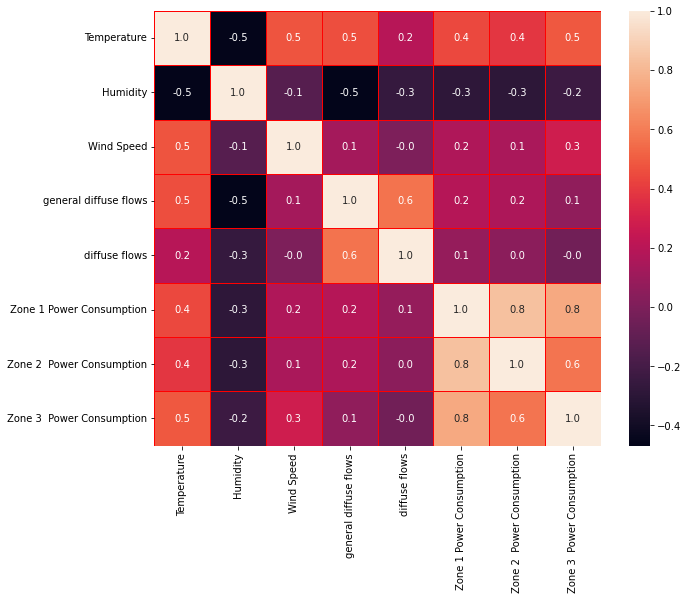

In [11]:
# Correlation 
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(data.corr(),
            annot = True,
            linecolor = 'r',
            linewidths = .5,
            fmt = '.1f',
            ax = ax);

To observe the correlation between the variables, a heatmap is constructed using seaborn. The correlation matrix that was constructed indicates the single correlation between each characteristic and the other features in the dataset. A correlation of -0.7 between two variables means that if one variable grows, the other drops considerably (as indicated in the list above).

Temperature is moderately positively correlated to all the power consumptions.

Although, Humidity, shows a weak negative correlation with the power consumption of all three zones.

Zone1, Zone2, and Zone3 Power Consumption zones shows higher correlation values between each other. This suggests there are minor differences in the consumption patterns of all the areas, and they all seem to increase or decrease together.

In [12]:
## Feature Creation
def create_features(df):
    """
    Create time series features like hour, month, year, day, etc. based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(data)

In [13]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,2017,1,1,52
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,2017,1,1,52
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,2017,1,1,52
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,2017,1,1,52
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,6,1,1,2017,1,1,52


In [14]:
# Function to calculate the total power consumption for each month:
def calculate_monthly_total_power(df):
    monthly_total_power = df.groupby('month')['Zone 1 Power Consumption'].sum()
    return monthly_total_power

In [15]:
monthly_total_power = calculate_monthly_total_power(df)
print(monthly_total_power)

month
1     1.385291e+08
2     1.249346e+08
3     1.390767e+08
4     1.346534e+08
5     1.446158e+08
6     1.494959e+08
7     1.599521e+08
8     1.626467e+08
9     1.442737e+08
10    1.465427e+08
11    1.252891e+08
12    1.253844e+08
Name: Zone 1 Power Consumption, dtype: float64


# Data Visualization

month
January      31032.49
February     30985.75
March        31155.17
April        31169.77
May          32396.01
June         34605.54
July         35831.55
August       36435.19
September    33396.68
October      32827.66
November     29002.11
December     29024.17
Name: Zone 1 Power Consumption, dtype: float64


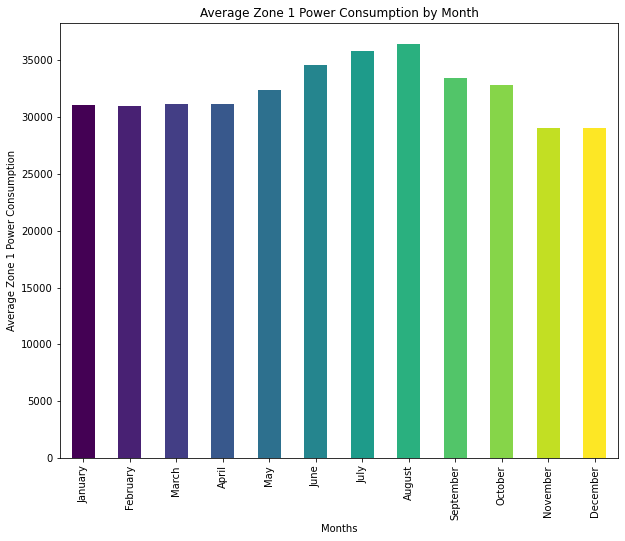

In [63]:
import calendar
# Create a dictionary to map month numbers to month names
month_names = {i: calendar.month_name[i] for i in range(1, 13)}

# Calculate the average power consumption of Zone 1 by month and replace month numbers with names
average_consumption = df.groupby('month')['Zone 1 Power Consumption'].mean().round(2).rename(month_names)

# Print the average consumption for each month
print(average_consumption)

# Create a color gradient based on months
colors = plt.cm.viridis(np.linspace(0, 1, len(average_consumption)))

# Create a bar plot of the average consumption for each month
average_consumption.plot.bar(color=colors, figsize = (10,8))

# Set the labels and title
plt.xlabel('Months')
plt.ylabel('Average Zone 1 Power Consumption')
plt.title('Average Zone 1 Power Consumption by Month')

# Display the plot
plt.show()

The graph above illustrates Zone 1 Power Consumption. We can observe that power use is greater in the months of May to August. This is because of the high temperatures throughout these months, which cause individuals to stay at home.

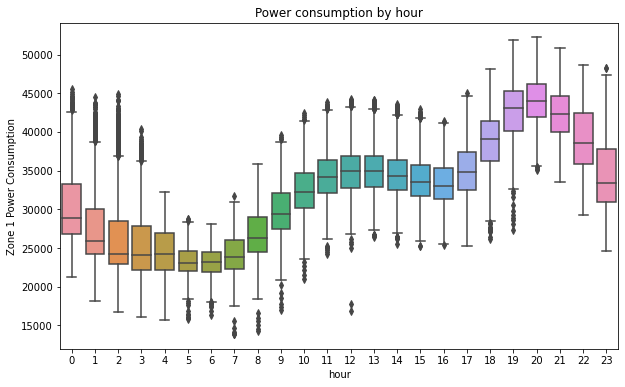

In [59]:
#Visualizing the features that we created with the target variable(Zone 1 Power Consumption)
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='hour', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by hour')
plt.show()


The boxplots above illustrate that electricity consumption increases from 8h to 16h, indicating that individual consumers and companies (big, medium, or small) use it during working hours. Furthermore, it climbs from 17h to 22h. As can be seen, there are a number of outliers in the datapoints at specific hours in the morning (0h-3h).

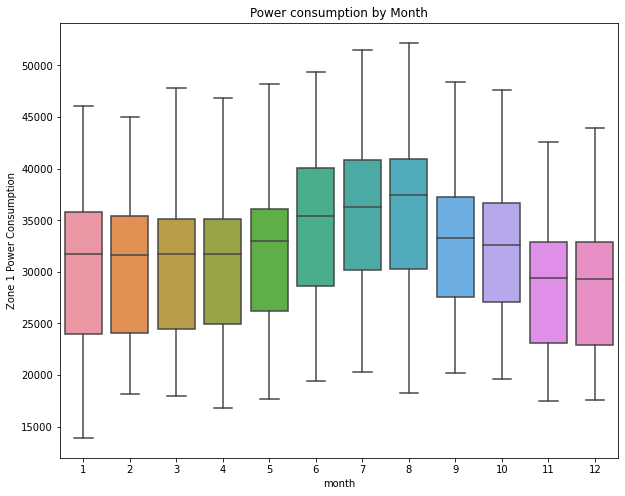

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by Month')
plt.show()

As demonstrated in the boxplots, the winter months of January, February, March, and April have lower power consumption, November and December even lower than the former, and the hottest months of June, July, and August have the highest power demand.

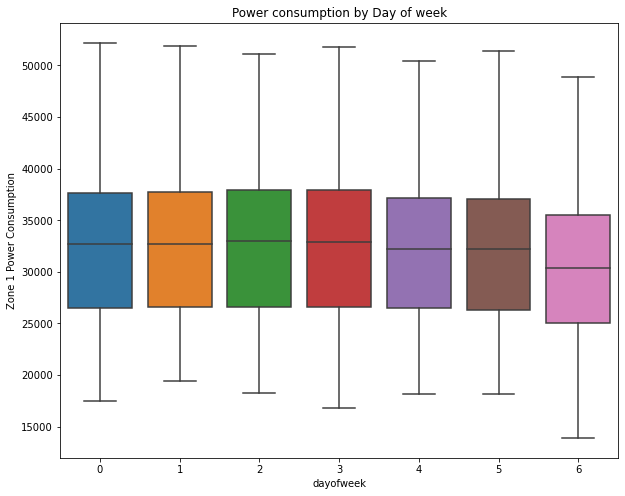

In [120]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by Day of week')
plt.show()

Power usage is constant throughout the week, with the exception of Sunday, which is the least consumed for obvious reasons.

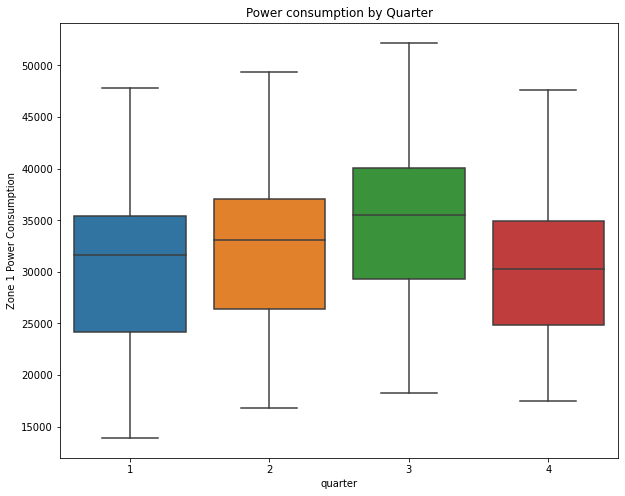

In [61]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by Quarter')
plt.show()

This is readily explained in combination with the'month' column as mentioned above; the summer months or the third quarter consume the most electricity, while the first and fourth quarters consume the least.

# Machine Learning Modeling using Regression Techniques.

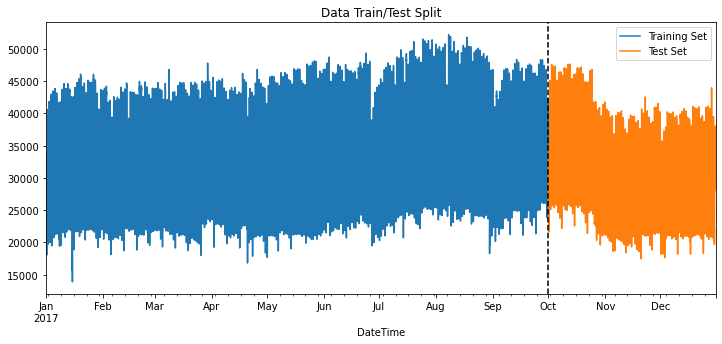

In [67]:
train_data = df.loc[:'10-01-2017',['Zone 1 Power Consumption']]

test_data = df.loc['10-01-2017':, ['Zone 1 Power Consumption']]

fig, ax = plt.subplots(figsize=(12, 5))
train_data.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_data.plot(ax=ax, label='Test Set')
ax.axvline('10-01-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

I have only considered the Zone 1 Power Consumption values to test with different regression models and also the other zones power consumption values does not vary drastically from the Zone 1 as we can find from the correlation heat map, so it wont make a big difference.

In [68]:
# Create the train and test datasets using the create_features function.
train = create_features(train_data)
test = create_features(test_data)


In [69]:
train

,Zone 1 Power Consumption,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,
2017-01-01 00:00:00,34055.69620,0,6,1,1,2017,1,1,52
2017-01-01 00:10:00,29814.68354,0,6,1,1,2017,1,1,52
2017-01-01 00:20:00,29128.10127,0,6,1,1,2017,1,1,52
2017-01-01 00:30:00,28228.86076,0,6,1,1,2017,1,1,52
2017-01-01 00:40:00,27335.69620,0,6,1,1,2017,1,1,52
...,...,...,...,...,...,...,...,...,...
2017-10-01 23:10:00,34225.99562,23,6,4,10,2017,274,1,39
2017-10-01 23:20:00,33450.85339,23,6,4,10,2017,274,1,39
2017-10-01 23:30:00,32543.36980,23,6,4,10,2017,274,1,39


In [70]:
#defining input and target variable
X_train = df.loc[:'10-01-2017',['Temperature', 'dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']]
y_train = df.loc[:'10-01-2017', ['Zone 1 Power Consumption']]
X_test = df.loc['10-01-2017':,['Temperature', 'dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']]
y_test = df.loc['10-01-2017':, ['Zone 1 Power Consumption']]

Now, we test with different ML algoritm (Linear regression, decision tree, random forest, xgboost, svm, neural nets, etc.) and then check which has the best RMSE score and the worst RMSE score Since the data is already stationary,

Linear Regression - Linear regression is a statistical modeling approach that can aid in the analysis and comprehension of correlations between variables in a dataset. Linear regression can be applied in the provided dataset to investigate the connection between the dependent variable (power consumption) and the independent factors (such as date, time, zone, and so on).

Linear regression is used to create a prediction model based on other factors in the dataset to estimate electricity usage. We can forecast future power consumption numbers by fitting a linear regression model to previous data. As we can see that the predicted data mostly overlaps the original data, which means that the predicted value is mostly accurate.


In [76]:
# Linear Regression 
from sklearn.linear_model import LinearRegression
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

LinearRegression()

In [77]:
from sklearn.model_selection import TimeSeriesSplit
ts_cross_val = TimeSeriesSplit(n_splits=5)

In [90]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lr_regressor, X_train, y_train, cv = ts_cross_val, scoring= "neg_mean_squared_error")
cv

array([-15260014.455514  , -17945265.60122377, -39506530.73979357,
       -22948073.76097788, -19349383.9851988 ])

In [79]:
test['lr_prediction'] = lr_regressor.predict(X_test)

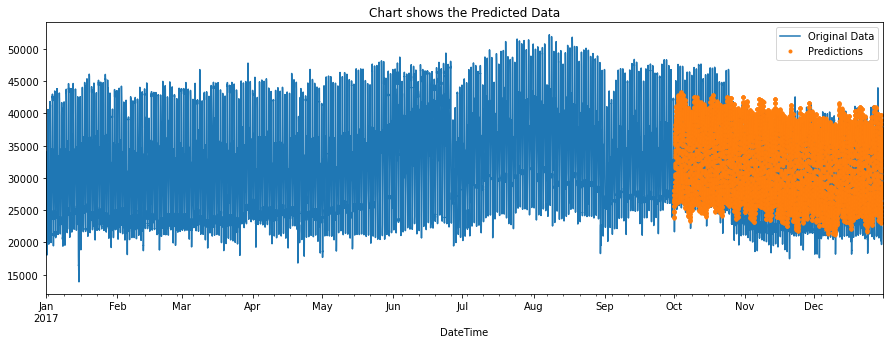

In [81]:
df = data.merge(test[['lr_prediction']], how='left', left_index=True, right_index=True)
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['lr_prediction'].plot(ax=ax, style='.')
plt.legend(['Original Data', 'Predictions'])
ax.set_title('Chart shows the Predicted Data')
plt.show()


In [82]:
np.sqrt(mean_squared_error(y_test,test['lr_prediction']))

4424.1175380348795

In [122]:
# Calculate the R^2 score
r2_score = lr_regressor.score(X_test, y_test)
print("R^2 Score:", r2_score)

R^2 Score: 0.5303745367892333


Decision Tree -Decision tree models shed light on feature relevance, variable connections, interpretability, dealing with nonlinear relationships, outlier identification, and variable interactions. These insights can help to comprehend the underlying patterns and relationships in the dataset, allowing for better decision-making and comprehension of the variables driving the target variable. The r2 value is 54%.

In [83]:
# Decision Tree Regression.
from sklearn.tree import DecisionTreeRegressor 
# create a regressor object
dtregressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
dtregressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [84]:
test['dt_prediction'] = dtregressor.predict(X_test)

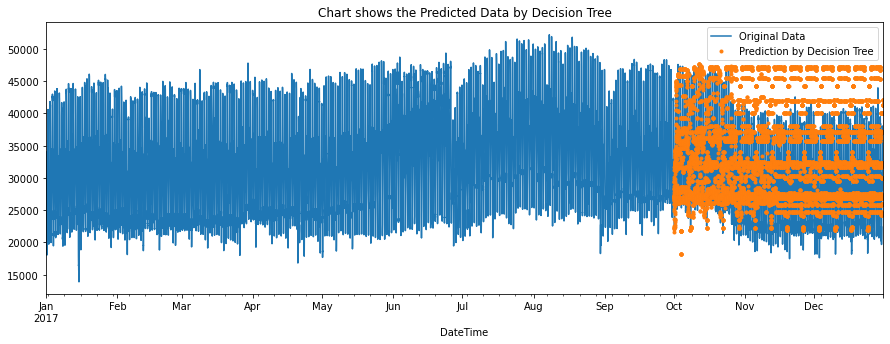

In [86]:
df = data.merge(test[['dt_prediction']], how='left', left_index=True, right_index=True)
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['dt_prediction'].plot(ax=ax, style='.')
plt.legend(['Original Data', 'Prediction by Decision Tree'])
ax.set_title('Chart shows the Predicted Data by Decision Tree')
plt.show()


In [87]:
np.sqrt(mean_squared_error(y_test,test['dt_prediction']))

4374.375344350009

In [104]:
r2_score = dtregressor.score(X_test, y_test)
print("R^2 Score:", r2_score)

R^2 Score: 0.5408755582127541


XGBoost Model - XGBoost or other machine learning algorithms to analyze power consumption datasets. By training an XGBoost model on historical power consumption data and relevant features, you can make predictions or gain insights into factors affecting power consumption, such as time of day, seasonality, weather conditions, or other variables included in the dataset.

In [92]:
# XGBoost Model.
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgbreg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1500,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=6,
                       learning_rate=0.03, 
                       random_state = 48)
xgbreg.fit(X_train, y_train,         
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[15:40:17] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:32789.44531	validation_1-rmse:29967.20703
[100]	validation_0-rmse:2234.43604	validation_1-rmse:3089.44019
[200]	validation_0-rmse:1357.09924	validation_1-rmse:3579.22681
[300]	validation_0-rmse:1266.16040	validation_1-rmse:3579.47534
[400]	validation_0-rmse:1193.21118	validation_1-rmse:3522.26538
[500]	validation_0-rmse:1147.44495	validation_1-rmse:3464.49683
[600]	validation_0-rmse:1116.93445	validation_1-rmse:3422.52783
[700]	validation_0-rmse:1089.15833	validation_1-rmse:3399.24780
[800]	validation_0-rmse:1065.89502	validation_1-rmse:3418.48560
[900]	validation_0-rmse:1043.12781	validation_1-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=48,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
test['xgb_prediction'] = xgbreg.predict(X_test)

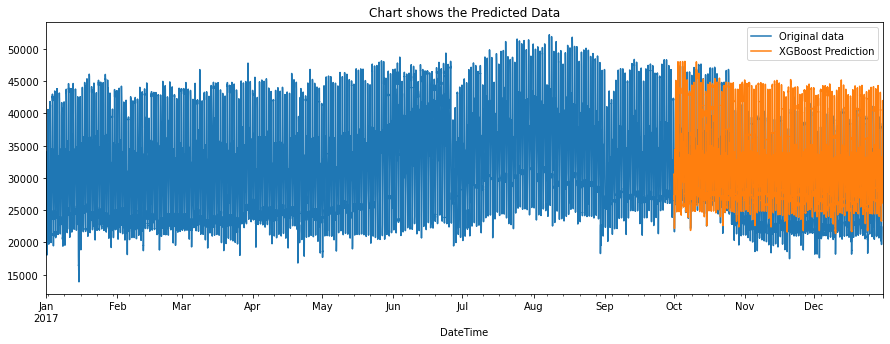

In [95]:
df = data.merge(test[['xgb_prediction']], how='left', left_index=True, right_index=True)
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['xgb_prediction'].plot(ax=ax, style='-')
plt.legend(['Original data', 'XGBoost Prediction'])
ax.set_title('Chart shows the Predicted Data')
plt.show()


In [96]:
np.sqrt(mean_squared_error(y_test,test['xgb_prediction']))

3364.8932857425393

In [97]:
r2_score(y_test, test['xgb_prediction'])

0.728330480664884

# Conclusion:
According to the data, the greatest electricity is consumed in all three zones during the months of July and August, with zone 1 using the most. The increased demand of electricity in July and August is due to the high temperature and low humidity during this month. And Saturday is the busiest day for power use during the week. 
Temperature is exactly related to energy consumption in all three zones, which implies that as the temperature rises, so will power usage. In all three zones, humidity and wind speed are inversely linked to energy usage. Another intriguing finding using logistic regression is that temperature, humidity, and wind speed have a substantial influence on power usage in zones 1 and 2, whereas wind speed has no significant impact on power consumption in zone 3. Among the three model that are used for the analyzes XGboost is has the highest accuracy which is 72% and also it is the only model which has the less mean squared error value.

# References:
UCI Machine Learning Repository: Power consumption of Tetouan City Data Set. (n.d.). https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city 

Weatherspark.com. Tétouan Climate, Weather By Month, Average Temperature (Morocco) - Weather Spark. (n.d.). https://weatherspark.com/y/34068/Average-Weather-in-T%C3%A9touan-Morocco-Year-Round 

Maklin, C. (2020, May 9). XGBoost Python example. Medium. 
https://towardsdatascience.com/xgboost-python-example-42777d01001e 

Amer, M. A. (2022, March 5). Decision tree models using python - build, visualize, evaluate. Medium. https://towardsdatascience.com/decision-tree-models-934474910aec 